In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn

In [ ]:
url = "/content/cleaned_dataset.csv"
df = pd.read_csv(url)

In [ ]:
df.head()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,sealevelpressure,conditions
0,23.0,16.0,19.1,23.0,16.0,19.1,15.1,79.3,0.0,0.0,0.0,1018.6,Clear
1,23.0,14.0,17.9,23.0,14.0,17.9,14.6,82.3,0.0,0.0,0.0,1017.3,cloudy
2,24.0,14.0,18.4,24.0,14.0,18.4,14.1,77.6,0.0,0.0,0.0,1015.9,Clear
3,23.0,13.0,17.6,23.0,13.0,17.6,13.4,78.0,0.0,0.0,0.0,1016.6,Clear
4,24.0,13.0,17.9,24.0,13.0,17.9,13.0,75.7,0.0,0.0,0.0,1015.8,Clear


In [ ]:
X = df.iloc[: , 0:12]
Y = df.iloc[: , -1]

In [ ]:
X.drop(['feelslikemax' , 'feelslikemin' , 'precipcover'] , axis = 1 , inplace = True)

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.2 , random_state = 150
                                                       )

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
Y_train_tf = encoder.fit_transform(Y_train)
Y_test_tf = encoder.transform(Y_test)

In [ ]:
clf2 = MultinomialNB()

In [ ]:
clf2.fit(X_train , Y_train_tf)

MultinomialNB()

In [ ]:
Y_pred2 = clf2.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print("Multinomial " , accuracy_score(Y_test_tf , Y_pred2))

Multinomial  0.9113924050632911


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf2, X_test, Y_test_tf, cv=5)
scores

array([0.8125, 0.9375, 0.8125, 1.    , 1.    ])

In [ ]:
from sklearn.metrics import f1_score
f1_score(clf2.predict(X_test),Y_test_tf,average='weighted')

0.9116957258846405

In [ ]:
print(scores.mean())

0.9125


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 30)
rf.fit(X_train , Y_train_tf)

RandomForestClassifier(n_estimators=30)

In [ ]:
Y_pred_rf = rf.predict(X_test)

In [ ]:
print("Random Forest " , accuracy_score(Y_test_tf , Y_pred_rf))

Random Forest  0.9367088607594937


In [ ]:
rf_probs = rf.predict_proba(X_test)
mb_probs = clf2.predict_proba(X_test)

In [ ]:
rf_probs = rf_probs[: , 1].flatten()
mb_probs = mb_probs[: , 1].flatten()
# rf_probs.shape

In [ ]:
rf_probs.shape

(79,)

In [ ]:
Y_test_tf.shape

(79,)

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
# rf_auc = roc_auc_score(Y_test_tf.reshape(1,-1) , rf_probs.reshape(1,-1) , multi_class = "ovr")
# mb_auc = roc_auc_score(Y_test_tf , mb_probs , multi_class = "ovr")

# rf_fpr , rf_tpr , threshold = roc_curve(Y_test_tf , Y_pred_rf , multi_class = 'ovr')
# auc_rf = auc(rf_fpr , rf_tpr)

In [330]:
# import matplotlib as plt
# from sklearn.multiclass import OneVsRestClassifier
# clf = OneVsRestClassifier(MultinomialNB())
# y_score = clf.fit(X_train, Y_train_tf).predict_proba(X_test)
# classes = 3
# # Compute ROC curve and ROC area for each class
# fpr = dict()
# tpr = dict()
# roc_auc = dict()
# for i in range(classes):
#     fpr[i] = roc_curve(Y_test_tf[:, i], y_score[:, i]).flatten()
#     tpr[i] = roc_curve(Y_test_tf[:, i], y_score[:, i]).flatten()
#     roc_auc[i] = auc(fpr[i], tpr[i])

# # Plot of a ROC curve for a specific class
# for i in range(classes):
#     plt.figure()
#     plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
#     plt.plot([0, 1], [0, 1], 'k--')
#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.05])
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('Receiver operating characteristic example')
#     plt.legend(loc="lower right")

In [ ]:
label_binarizer.transform(df["conditions"])

array([[1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       ...,
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0]])

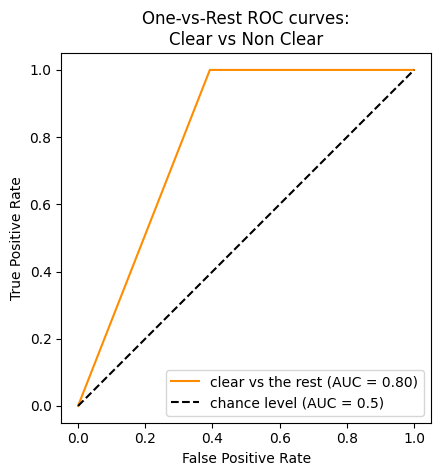

In [ ]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(Y_train)
y_onehot_test = label_binarizer.transform(Y_test)
y_onehot_test.shape  # (n_samples, n_classes)
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

class_of_interest = "clear"
class_id = 1

RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\nClear vs Non Clear")
plt.legend()
plt.show()

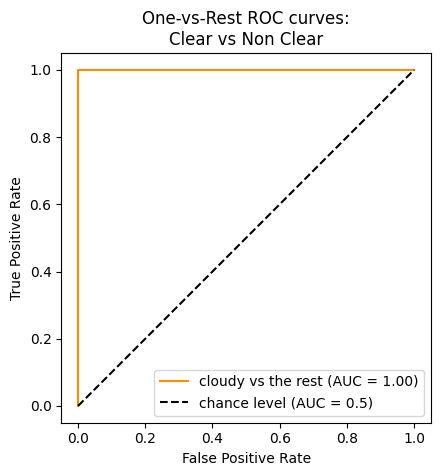

In [ ]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(Y_train)
y_onehot_test = label_binarizer.transform(Y_test)
y_onehot_test.shape  # (n_samples, n_classes)
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

class_of_interest = "cloudy"
class_id = 2

RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\nClear vs Non Clear")
plt.legend()
plt.show()